In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import connection

In [4]:
conn = connection()

In [5]:
df_t_pulse = pd.read_sql("SELECT * FROM t_pulse_data LIMIT 1000", conn)

In [6]:
df_t_pulse

,id,ticker,inserted,text,commentsCount,reactionCount,reactions_counters
0,a3015737-be7e-4b5d-a447-fab2c28324f7,RUAL,2021-03-15,{$RUAL}\nКапитализация РУСАЛ 696 млрд. рублей\...,2,5,"[{'type': 'like', 'count': 5}]"
1,0108d111-0f7a-4dfe-8888-45a36708d408,RUAL,2021-03-15,{$RUAL} это 46? дайте пройти,0,3,"[{'type': 'like', 'count': 3}]"
2,ffb0e9a8-9232-48ff-94cd-c4d64e00a7ee,RUAL,2021-03-15,"{$RUAL} а что за бред в стакане, все до отчета...",0,0,[]
3,5a748b9d-5def-43fe-a59a-f6797585b9df,RUAL,2021-03-15,{$RUAL} уместен ли тут шорт ?,1,0,[]
4,eb6634e5-ac06-446d-9acc-406d03fb9dea,RUAL,2021-03-15,Докупили ещё 20 акций {$RUAL} \nПрогнозируют н...,0,3,"[{'type': 'not-convinced', 'count': 3}]"
...,...,...,...,...,...,...,...
995,3712599f-770a-45c2-975d-ea1f24c1e02c,RUAL,2020-12-20,"Если одна акция стоит ₽1, а другая ₽1000, это ...",1,4,"[{'type': 'like', 'count': 4}]"
996,aa58e1d3-8dfa-434b-a870-cdba80a5cfae,RUAL,2020-11-10,"{$RUAL} Когда покупал думал о""алюминий, а оказ...",0,2,"[{'type': 'like', 'count': 2}]"
997,20866c5b-ada1-49ea-95ac-5bc200aa802a,RUAL,2020-08-20,{$RUAL} помню после отчёта хорошего акция резк...,4,0,[]
998,346fd8ff-68cf-40a6-9035-4f33529ec3f3,RUAL,2020-12-19,{$RUAL} Размышления дилетанта. Думаю что раз з...,0,3,"[{'type': 'like', 'count': 3}]"


In [7]:
tickers_info = pd.read_sql("""
    SELECT ticker, COUNT(*) as post_count
    FROM t_pulse_data 
    GROUP BY ticker 
    ORDER BY post_count DESC
""", conn)

In [8]:
tickers_info

,ticker,post_count
0,T,194523
1,GAZP,189283
2,VTBR,131445
3,MTLR,113406
4,SBER,100291
...,...,...
76,CNRU,2002
77,FIXR,1936
78,IRAO,1774
79,RASP,1511


In [9]:
tickers_info.describe()

,post_count
count,81.000000
mean,35010.864198
std,37835.003737
min,1367.000000
25%,8859.000000
50%,22911.000000
75%,50452.000000
max,194523.000000


In [21]:
tickers_info.ticker.unique()

array(['T', 'GAZP', 'VTBR', 'MTLR', 'SBER', 'EUTR', 'SGZH', 'PLZL',
       'GMKN', 'SPBE', 'ALRS', 'RNFT', 'CHMF', 'PIKK', 'MTSS', 'AFKS',
       'WUSH', 'NLMK', 'MAGN', 'POSI', 'RUAL', 'LKOH', 'SNGSP', 'ROSN',
       'SOFL', 'SFIN', 'UGLD', 'SELG', 'TRMK', 'NMTP', 'UPRO', 'MVID',
       'SBERP', 'RTKM', 'ASTR', 'IRKT', 'HYDR', 'VKCO', 'SVCB', 'LSRG',
       'TATN', 'AQUA', 'SVAV', 'NVTK', 'FEES', 'SMLT', 'AFLT', 'ENPG',
       'MOEX', 'MGNT', 'SIBN', 'RENI', 'OGKB', 'RTKMP', 'YDEX', 'PHOR',
       'HEAD', 'LEAS', 'CBOM', 'AKRN', 'BSPB', 'TTLK', 'LENT', 'SNGS',
       'VSMO', 'FLOT', 'X5', 'BELU', 'MRKP', 'OZPH', 'TATNP', 'IVAT',
       'MRKC', 'RAGR', 'MDMG', 'UWGN', 'CNRU', 'FIXR', 'IRAO', 'RASP',
       'VSEH'], dtype=object)

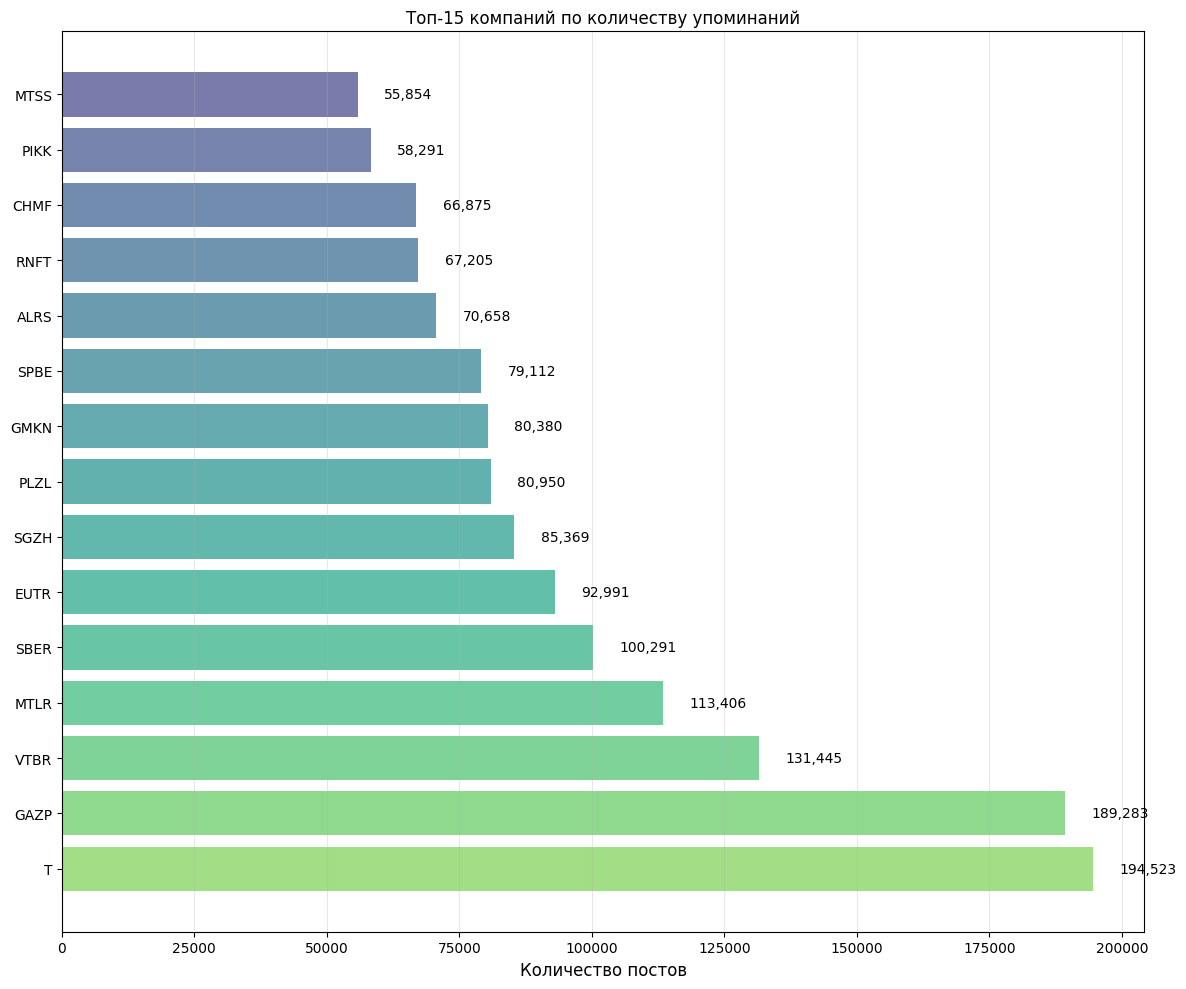

In [22]:
plt.figure(figsize=(12, 10))
top_15 = tickers_info.head(15)

colors = plt.cm.viridis_r(np.linspace(0.2, 0.8, len(top_15)))

bars = plt.barh(top_15['ticker'], top_15['post_count'], color=colors, alpha=0.7)

plt.xlabel('Количество постов', fontsize=12)
plt.title('Топ-15 компаний по количеству упоминаний')

for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 5000, bar.get_y() + bar.get_height()/2, 
             f'{width:,}', ha='left', va='center', fontsize=10)

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()